# Mod 6 Final Project

Jeremy Owens, Bridget Boakye

## Problem Statement:

Pulsar stars are some of the most interesting structures in our universe. As a subset of Neutron stars, they exist somewhere between the typical condensed white dwarfs that stars like our sun will turn into at the end of they're life cycle, but aren't so dense that they're gravity reverses on itself, which results in a black hole. Pulsars are neutron stars that exhibit periodic radio signals that our telescopes on earth can read, but as there are many radio producing objects our our universe, separating these signals from the noise can be very complicated for human researchers. Our aim here is to utilize differing machine learning libraries, and find the most accurate one, for determining which of these periodic signals are pulsar stars that we should direct our telescopes towards for further research, and which signals are ambient noise.

## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, advanced_activations
from keras import initializers, regularizers
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE
# from imblearn.over_sampling import ADASYN

# from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## EDA

In [2]:
pulsar_df = pd.read_csv('pulsar_stars.csv')
pulsar_df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


### Scatter plot exploration

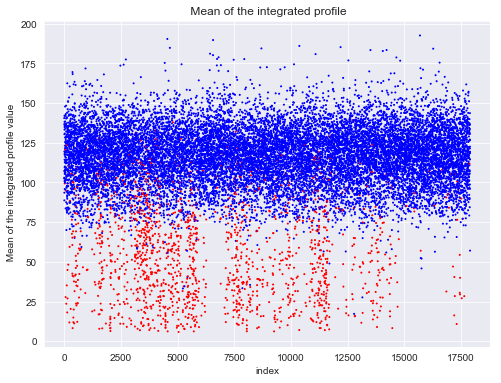

<Figure size 432x288 with 0 Axes>

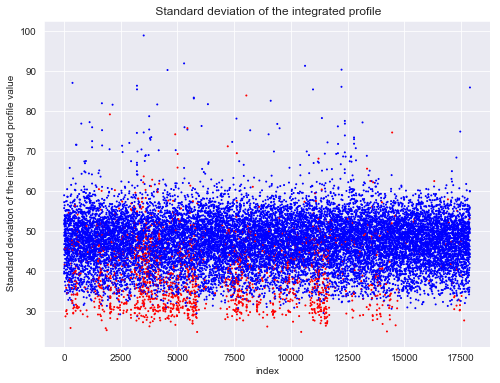

<Figure size 432x288 with 0 Axes>

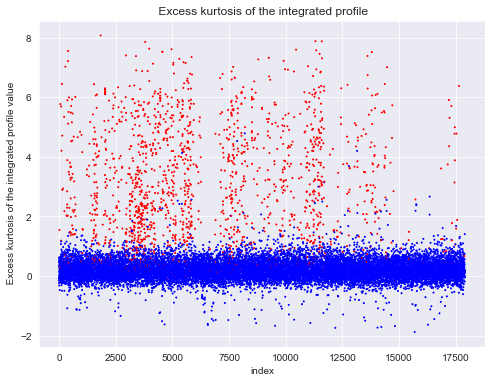

<Figure size 432x288 with 0 Axes>

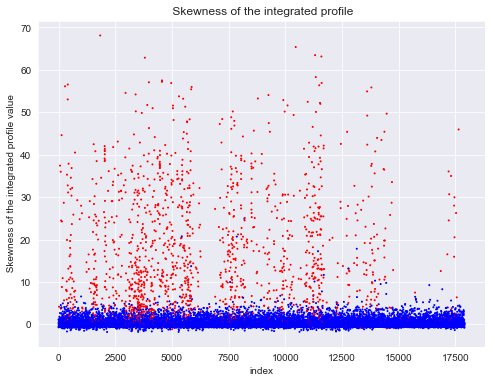

<Figure size 432x288 with 0 Axes>

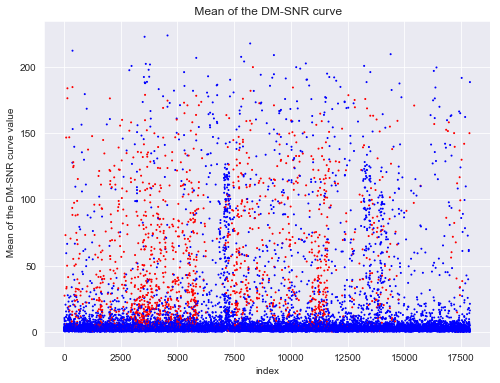

<Figure size 432x288 with 0 Axes>

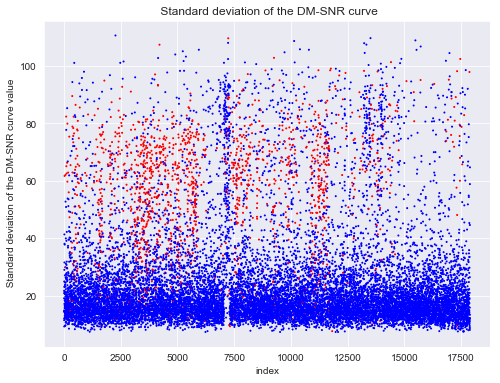

<Figure size 432x288 with 0 Axes>

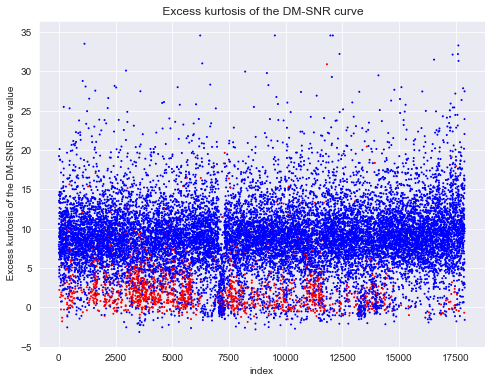

<Figure size 432x288 with 0 Axes>

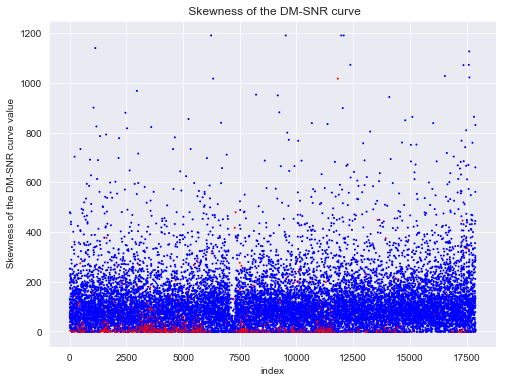

<Figure size 432x288 with 0 Axes>

In [189]:
for col in pulsar_df.columns[:-1]:
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(pulsar_df)), pulsar_df[col], 
                c=['b' if x==0 else 'r' for x in pulsar_df.target_class.values], s=1)
    plt.title(col)
    plt.xlabel('index')
    plt.ylabel(col+' value')
    plt.show()
    plt.clf()

Checking for extraneous values in min and max of each feature

In [3]:
for col in pulsar_df.columns:
    print(min(pulsar_df[col]), max(pulsar_df[col]))

5.8125 192.6171875
24.77204176 98.77891067
-1.876011181 8.069522046
-1.7918859809999999 68.10162173
0.213210702 223.39214049999998
7.370432165 110.64221059999998
-3.1392696110000005 34.53984419
-1.976975603 1191.0008369999998
0 1


In [4]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Scaling Data for ML Analysis

In [139]:
random_seed = 123

X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
features = X.columns

scalar = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12528, 8) (5370, 8)
(12528,) (5370,)


In [140]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(12528, 2) (5370, 2)


## Function Set Up

In [141]:
def confusion_reporting(true_values, pred_values):
    '''
    This function takes in the true values of a dataset and the predicted values
    of the dataset and prints out a classification report, accuracy score, and
    plots the confusion matrix of the true and predicted values for simple analysis
    '''
    print(confusion_matrix(true_values, pred_values))
    print(classification_report(true_values, pred_values))
    print('Accuracy score:', round(accuracy_score(true_values, pred_values), 4))

    cm = confusion_matrix(true_values, pred_values)
    df_cm = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],
                         index=['F', 'T'],
                         columns=['F', 'T'])
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, cmap='Greens')
    plt.xlabel('Pred Val')
    plt.ylabel('True Val')
    plt.show()

In [142]:
def grid_search_classifier(clf, param_grid, X_train, X_test, y_train, y_test, scoring='f1_weighted'):
    '''
    This takes in a machine learning classifier, parameter dictionary for grid searching values,
    as well as the scaled x and y train and test values. It then prints the ideal parameters for
    that classifier, and calls the confusion reporting function for easy analysis
    '''
    grid_clf = GridSearchCV(clf, param_grid, scoring=scoring, n_jobs=-1)
    grid_clf.fit(X_train, y_train)

    best_parameters = grid_clf.best_params_

    print("Grid Search found the following optimal parameters: ")
    for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

    y_pred = grid_clf.predict(X_test)

    print()
    confusion_reporting(y_test, y_pred)
    return grid_clf

## Baseline Machine Learning Model - Random Forest

We first wanted to implement a standard machine learning model (Random Forest) before embarking on neural networks, to determine what score we were trying to beat.

In [99]:
param_grid = {'max_depth': [5, 10, 15, 30],
              'max_features': [2, 5, 8],
              'n_estimators': [10, 25, 50, 100, 250]
             }

Grid Search found the following optimal parameters: 
max_depth: 10
max_features: 8
n_estimators: 250

[[4816   44]
 [  74  436]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.91      0.85      0.88       510

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy score: 0.978


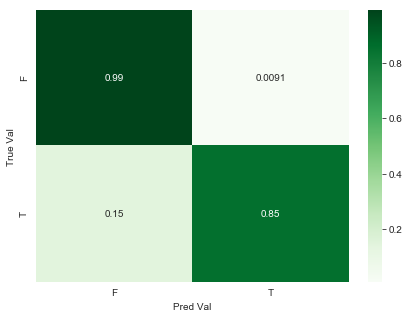

In [100]:
rf_grid_clf = grid_search_classifier(RandomForestClassifier(), param_grid, X_train, X_test, y_train, y_test)

A 97.8% accuracy score is pretty decent, but that still leaves a number of goose chases that our valuable telescopes have to analyze before determining that it's just noise.

## Baseline Neural Network Model

In [143]:
base_model = Sequential()
base_model.add(Dense(2, activation = 'sigmoid'))

base_model.compile(optimizer= "sgd", loss='mse', metrics=['acc'])
hist = base_model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_data=(X_test, y_test_cat))

Train on 12528 samples, validate on 5370 samples
Epoch 1/10
12528/12528 [==============================] - 1s 109us/step - loss: 0.2524 - acc: 0.7083 - val_loss: 0.2106 - val_acc: 0.8169
Epoch 2/10
12528/12528 [==============================] - 0s 38us/step - loss: 0.1732 - acc: 0.8581 - val_loss: 0.1467 - val_acc: 0.8831
Epoch 3/10
12528/12528 [==============================] - 1s 42us/step - loss: 0.1270 - acc: 0.8977 - val_loss: 0.1165 - val_acc: 0.9037
Epoch 4/10
12528/12528 [==============================] - 1s 53us/step - loss: 0.1039 - acc: 0.9119 - val_loss: 0.0987 - val_acc: 0.9160
Epoch 5/10
12528/12528 [==============================] - 1s 44us/step - loss: 0.0892 - acc: 0.9219 - val_loss: 0.0864 - val_acc: 0.9227
Epoch 6/10
12528/12528 [==============================] - 1s 42us/step - loss: 0.0786 - acc: 0.9284 - val_loss: 0.0773 - val_acc: 0.9279
Epoch 7/10
12528/12528 [==============================] - 1s 41us/step - loss: 0.0705 - acc: 0.9338 - val_loss: 0.0701 - val_acc

In [144]:
score = base_model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.054633048989808315
Test accuracy: 0.9504655492150361


[[4695  165]
 [ 101  409]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4860
           1       0.71      0.80      0.75       510

    accuracy                           0.95      5370
   macro avg       0.85      0.88      0.86      5370
weighted avg       0.95      0.95      0.95      5370

Accuracy score: 0.9505


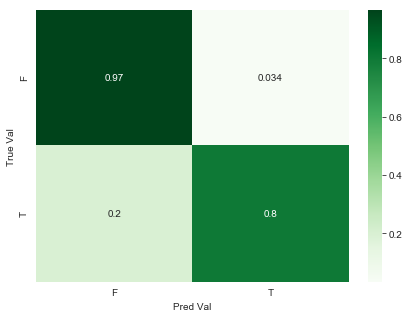

In [145]:
confusion_reporting(y_test, np.argmax(base_model.predict(X_test), axis=1))

Our baseline neural network performed even worse than a random forest classifier, so we decided to add a few layers, specify activations, etc. to improve it.

## Improved Neural Network Model

In [146]:
imp_model = Sequential()
imp_model.add(Dense(100, input_dim=8))
imp_model.add(advanced_activations.LeakyReLU(alpha=0.2))
imp_model.add(Dense(100))
imp_model.add(advanced_activations.LeakyReLU(alpha=0.2))
imp_model.add(Dense(100))
imp_model.add(advanced_activations.LeakyReLU(alpha=0.2))
imp_model.add(Dense(2, activation = 'sigmoid'))


imp_model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
hist = imp_model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                     validation_data=(X_test, y_test_cat))

Train on 12528 samples, validate on 5370 samples
Epoch 1/30
12528/12528 [==============================] - 2s 145us/step - loss: 0.2777 - acc: 0.9486 - val_loss: 0.1232 - val_acc: 0.9690
Epoch 2/30
12528/12528 [==============================] - 1s 63us/step - loss: 0.0956 - acc: 0.9740 - val_loss: 0.0929 - val_acc: 0.9740
Epoch 3/30
12528/12528 [==============================] - 1s 63us/step - loss: 0.0809 - acc: 0.9771 - val_loss: 0.0874 - val_acc: 0.9737
Epoch 4/30
12528/12528 [==============================] - 1s 59us/step - loss: 0.0769 - acc: 0.9784 - val_loss: 0.0851 - val_acc: 0.9742
Epoch 5/30
12528/12528 [==============================] - 1s 82us/step - loss: 0.0751 - acc: 0.9784 - val_loss: 0.0839 - val_acc: 0.9747
Epoch 6/30
12528/12528 [==============================] - 1s 64us/step - loss: 0.0739 - acc: 0.9786 - val_loss: 0.0830 - val_acc: 0.9751
Epoch 7/30
12528/12528 [==============================] - 1s 62us/step - loss: 0.0730 - acc: 0.9790 - val_loss: 0.0824 - val_acc

In [147]:
score = imp_model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.076805201582125
Test accuracy: 0.9781191806331471


[[4826   34]
 [  83  427]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4860
           1       0.93      0.84      0.88       510

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Accuracy score: 0.9782


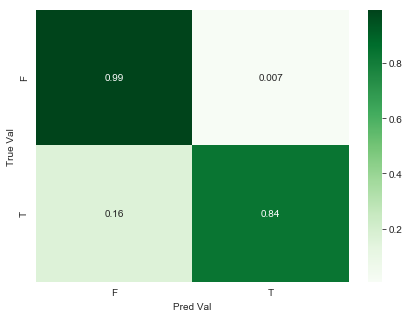

In [148]:
confusion_reporting(y_test, np.argmax(imp_model.predict(X_test), axis=1))

This still leaves us with the same accuracy score as the random forest classifier, so we weren't yet satisfied. We next decided to implement a stacked ensemble model for analyzing the dataset.

## Stacked Ensemble Modeling

The stacked model we designed consisted of two different train/test splits (a 90/10 and 70/30 split) as well as a stacking of a random forest, svc, KNN, and improved neural network for each split, all of which was then run through a neural network for final classification. A diagram is as follows:

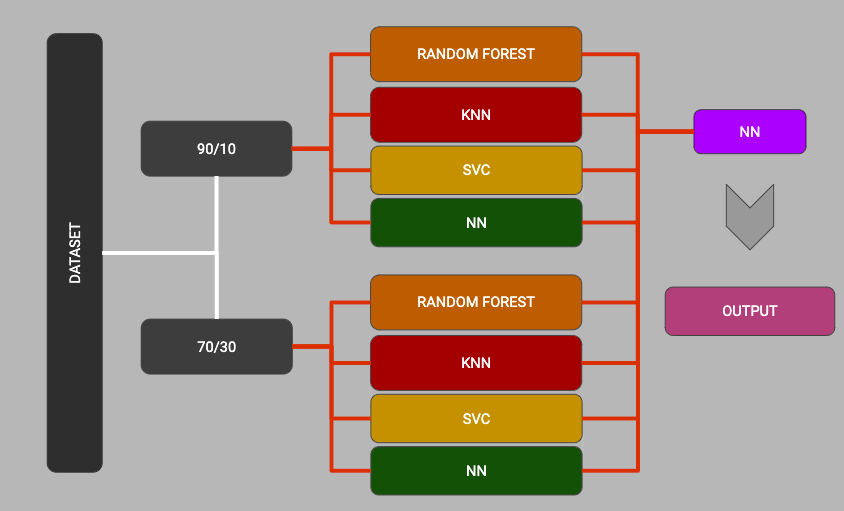

This notebook was focused on implementation of the 90/10 train/test split, while my partner's notebook was focused on the grid search and implementation of the 70/30 split.

### Train-Test-Lit 0.1

In [149]:
random_seed = 123 # setting a seed for repeatability

X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X = scalar.transform(X)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16108, 8) (1790, 8)
(16108,) (1790,)


In [150]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(16108, 2) (1790, 2)


### Random Forest

In [11]:
param_grid = {'max_depth': [5, 10, 15, 30],
              'max_features': [2, 5, 8],
              'n_estimators': [25, 50, 100, 250]
             }

Grid Search found the following optimal parameters: 
max_depth: 10
max_features: 5
n_estimators: 25

[[1606   15]
 [  28  141]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.90      0.83      0.87       169

    accuracy                           0.98      1790
   macro avg       0.94      0.91      0.93      1790
weighted avg       0.98      0.98      0.98      1790

Accuracy score: 0.976


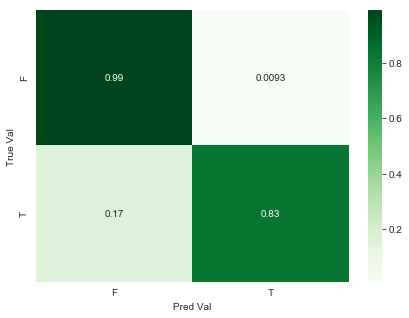

In [12]:
warnings.filterwarnings('ignore')

# grid searching the best random forest parameters
rf10_grid_clf = grid_search_classifier(RandomForestClassifier(), param_grid, X_train, X_test, y_train, y_test)

In [151]:
# fitting a random forest classifier with optimal parameters from grid search
rf10_class = RandomForestClassifier(max_depth=10, max_features=5, n_estimators=25)
rf10_class.fit(X_train, y_train)

# creating a prediction for entire dataset given training fit
rf10_predict = rf10_class.predict(X)
rf10_predict.shape

(17898,)

### SVC

In [89]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [.01, .1, 1, 10],
              'degree': [2, 3, 4],
              'shrinking': [True, False]
             }

Grid Search found the following optimal parameters: 
C: 10
degree: 2
kernel: 'rbf'
probability: True
shrinking: True

[[1612    9]
 [  32  137]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.94      0.81      0.87       169

    accuracy                           0.98      1790
   macro avg       0.96      0.90      0.93      1790
weighted avg       0.98      0.98      0.98      1790

Accuracy score: 0.9771


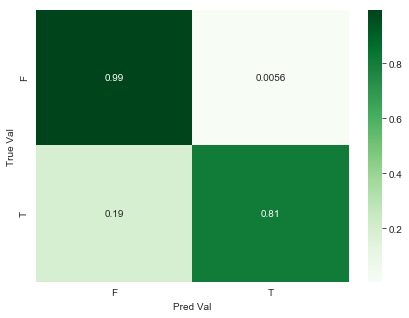

In [90]:
warnings.filterwarnings('ignore')

# grid searching the best support vector parameters
svc10_grid_clf = grid_search_classifier(SVC(), param_grid, X_train, X_test, y_train, y_test)

In [152]:
# fitting a support vector classifier with optimal parameters from grid search
svc10_class = SVC(C=10, kernel='rbf', probability=True, shrinking=True)
svc10_class.fit(X_train, y_train)

# creating a prediction for entire dataset given training fit
svc10_predict = svc10_class.predict(X)
svc10_predict.shape

(17898,)

### KNN

In [93]:
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': [3, 5, 8, 10, 15, 20],
              'metric': ['euclidean', 'manhattan']
             }

Grid Search found the following optimal parameters: 
metric: 'euclidean'
n_neighbors: 5
weights: 'distance'

[[1609   12]
 [  33  136]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.92      0.80      0.86       169

    accuracy                           0.97      1790
   macro avg       0.95      0.90      0.92      1790
weighted avg       0.97      0.97      0.97      1790

Accuracy score: 0.9749


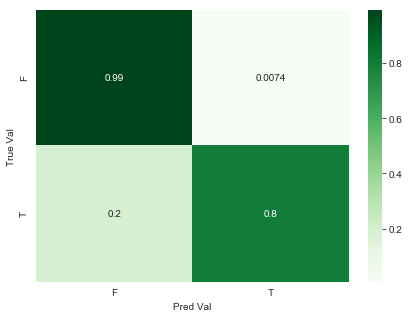

In [94]:
warnings.filterwarnings('ignore')

# grid searching the best KNN parameters
knn_grid_clf = grid_search_classifier(KNeighborsClassifier(), param_grid, X_train, X_test, y_train, y_test)

In [153]:
# fitting a KNN classifier with optimal parameters from grid search
knn10_class = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn10_class.fit(X_train, y_train)

# creating a prediction for entire dataset given training fit
knn10_predict = knn10_class.predict(X)
knn10_predict.shape

(17898,)

### Neural Network

In [154]:
warnings.filterwarnings('ignore')

# building and fitting improved neural network on training data
nn10_model = Sequential()
nn10_model.add(Dense(200, input_dim=8))
nn10_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn10_model.add(Dense(200))
nn10_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn10_model.add(Dense(200))
nn10_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn10_model.add(Dense(2, activation = 'sigmoid'))


nn10_model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
hist = nn10_model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                    validation_data=(X_test, y_test_cat))

Train on 16108 samples, validate on 1790 samples
Epoch 1/30
16108/16108 [==============================] - 2s 142us/step - loss: 0.2700 - acc: 0.9519 - val_loss: 0.1141 - val_acc: 0.9673
Epoch 2/30
16108/16108 [==============================] - 1s 82us/step - loss: 0.0906 - acc: 0.9744 - val_loss: 0.0937 - val_acc: 0.9701
Epoch 3/30
16108/16108 [==============================] - 1s 78us/step - loss: 0.0801 - acc: 0.9775 - val_loss: 0.0908 - val_acc: 0.9709
Epoch 4/30
16108/16108 [==============================] - 1s 93us/step - loss: 0.0772 - acc: 0.9780 - val_loss: 0.0888 - val_acc: 0.9721
Epoch 5/30
16108/16108 [==============================] - 1s 78us/step - loss: 0.0754 - acc: 0.9785 - val_loss: 0.0878 - val_acc: 0.9712
Epoch 6/30
16108/16108 [==============================] - 1s 79us/step - loss: 0.0744 - acc: 0.9787 - val_loss: 0.0868 - val_acc: 0.9726
Epoch 7/30
16108/16108 [==============================] - 1s 81us/step - loss: 0.0735 - acc: 0.9789 - val_loss: 0.0862 - val_acc

In [155]:
# creating a prediction for entire dataset given training fit
nn10_predict = nn10_model.predict(X)
nn10_predict_int = np.argmax(nn10_predict, axis=1)
nn10_predict_int.shape

(17898,)

[[1607   14]
 [  29  140]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.91      0.83      0.87       169

    accuracy                           0.98      1790
   macro avg       0.95      0.91      0.93      1790
weighted avg       0.98      0.98      0.98      1790

Accuracy score: 0.976


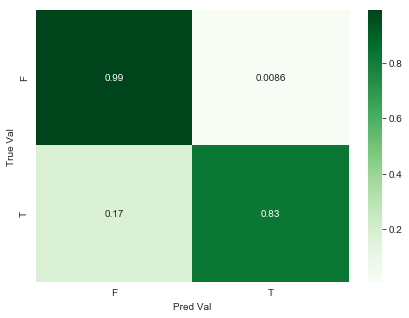

In [156]:
confusion_reporting(y_test, np.argmax(nn10_model.predict(X_test), axis=1))

### Train-Test-Lit 0.3

All model parameters used below were copied from grid searches in partner's notebook

In [157]:
random_seed = 456 # set number for repeatability
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X = scalar.transform(X)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12528, 8) (5370, 8)
(12528,) (5370,)


In [158]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
print(y_train_cat.shape, y_test_cat.shape)

(12528, 2) (5370, 2)


### Random Forest

In [159]:
rf30_class = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=5, random_state=random_seed)
rf30_class.fit(X_train, y_train)
rf30_predict = rf30_class.predict(X)
rf30_predict.shape

(17898,)

### SVC

In [160]:
svc30_class = SVC(C=1, kernel='rbf', shrinking=True)
svc30_class.fit(X_train, y_train)
svc30_predict = svc30_class.predict(X)
svc30_predict.shape

(17898,)

### KNN

In [161]:
knn30_class = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
knn30_class.fit(X_train, y_train)
knn30_predict = knn30_class.predict(X)
knn30_predict.shape

(17898,)

### Neural Network

In [162]:
nn30_model= Sequential()
nn30_model.add(Dense(200, input_dim = 8)) #2 hidden layers
nn30_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn30_model.add(Dense(200))
nn30_model.add(advanced_activations.LeakyReLU(alpha=0.2))
nn30_model.add(Dense(2, activation='sigmoid'))
#compile model 
nn30_model.compile(optimizer='Adam',
                   loss='binary_crossentropy',
                   metrics=['acc'])
#training the network 
history = nn30_model.fit(X_train,
                         y_train_cat,
                         epochs=30,
                         batch_size=32,
                         validation_data=(X_test, y_test_cat))

Train on 12528 samples, validate on 5370 samples
Epoch 1/30
12528/12528 [==============================] - 2s 178us/step - loss: 0.0952 - acc: 0.9755 - val_loss: 0.0720 - val_acc: 0.9813
Epoch 2/30
12528/12528 [==============================] - 1s 115us/step - loss: 0.0722 - acc: 0.9786 - val_loss: 0.0681 - val_acc: 0.9818
Epoch 3/30
12528/12528 [==============================] - 1s 101us/step - loss: 0.0710 - acc: 0.9782 - val_loss: 0.0671 - val_acc: 0.9818
Epoch 4/30
12528/12528 [==============================] - 1s 90us/step - loss: 0.0695 - acc: 0.9791 - val_loss: 0.0654 - val_acc: 0.9817
Epoch 5/30
12528/12528 [==============================] - 1s 112us/step - loss: 0.0686 - acc: 0.9791 - val_loss: 0.0676 - val_acc: 0.9811
Epoch 6/30
12528/12528 [==============================] - 1s 103us/step - loss: 0.0685 - acc: 0.9791 - val_loss: 0.0666 - val_acc: 0.9818
Epoch 7/30
12528/12528 [==============================] - 1s 105us/step - loss: 0.0686 - acc: 0.9794 - val_loss: 0.0662 - va

In [163]:
nn30_predict = nn30_model.predict(X)
nn30_predict_int = np.argmax(nn30_predict, axis=1)
nn30_predict_int.shape

(17898,)

### Stacked Prediction Through Final Neural Network

In [165]:
# Creation of dataframe from predictions of all stacked classifiers
stacked_predict = pd.DataFrame({'rf10': rf10_predict, 'knn10': knn10_predict, 'nn10': nn10_predict_int, 
                                'rf30': rf30_predict, 'knn30': knn30_predict, 'nn30': nn30_predict_int,
                                'svc10': svc10_predict, 'svc30': svc30_predict,
                                'y': y.values})

In [166]:
stacked_predict.head(20)

,rf10,knn10,nn10,rf30,knn30,nn30,svc10,svc30,y
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


In [167]:
# train/test split of 80/20 for stacked prediction dataframe
X = stacked_predict.drop('y', axis=1)
y = stacked_predict['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [169]:
# final neural network to run predictions through
stacked_model = Sequential()
stacked_model.add(Dense(100, input_dim=8))
stacked_model.add(advanced_activations.LeakyReLU(alpha=0.2))
stacked_model.add(Dense(100))
stacked_model.add(advanced_activations.LeakyReLU(alpha=0.2))
stacked_model.add(Dense(100))
stacked_model.add(advanced_activations.LeakyReLU(alpha=0.2))
stacked_model.add(Dense(2, activation = 'sigmoid'))

# compile and fit the NN model
stacked_model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics=['acc'])
final_model = stacked_model.fit(X_train, y_train_cat, batch_size=32, epochs=30, 
                      validation_data=(X_test, y_test_cat))

Train on 14318 samples, validate on 3580 samples
Epoch 1/30
14318/14318 [==============================] - 2s 136us/step - loss: 0.3347 - acc: 0.9488 - val_loss: 0.1344 - val_acc: 0.9810
Epoch 2/30
14318/14318 [==============================] - 1s 62us/step - loss: 0.0706 - acc: 0.9875 - val_loss: 0.0655 - val_acc: 0.9830
Epoch 3/30
14318/14318 [==============================] - 1s 72us/step - loss: 0.0331 - acc: 0.9892 - val_loss: 0.0555 - val_acc: 0.9841
Epoch 4/30
14318/14318 [==============================] - 1s 82us/step - loss: 0.0223 - acc: 0.9935 - val_loss: 0.0523 - val_acc: 0.9839
Epoch 5/30
14318/14318 [==============================] - 1s 92us/step - loss: 0.0169 - acc: 0.9961 - val_loss: 0.0507 - val_acc: 0.9841
Epoch 6/30
14318/14318 [==============================] - 1s 80us/step - loss: 0.0136 - acc: 0.9964 - val_loss: 0.0496 - val_acc: 0.9841
Epoch 7/30
14318/14318 [==============================] - 1s 63us/step - loss: 0.0114 - acc: 0.9964 - val_loss: 0.0487 - val_acc

[[3234    9]
 [  13  324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3243
           1       0.97      0.96      0.97       337

    accuracy                           0.99      3580
   macro avg       0.98      0.98      0.98      3580
weighted avg       0.99      0.99      0.99      3580

Accuracy score: 0.9939


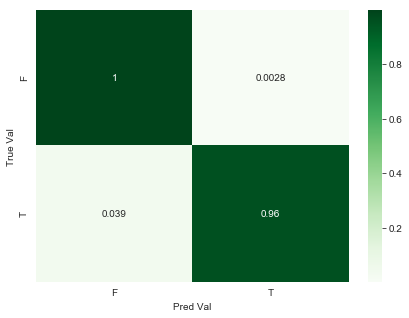

In [171]:
confusion_reporting(y_test, np.argmax(stacked_model.predict(X_test), axis=1))

## Conclusion

With our stacked model, we were able to acheive an accuracy score of 99.4% significantly reducing our chances of chasing down signals that aren't the stars we want to study, and ensuring that we miss far fewer of the stars that could be significant to our future studies of the cosmos.